In [9]:
!pip install pandas


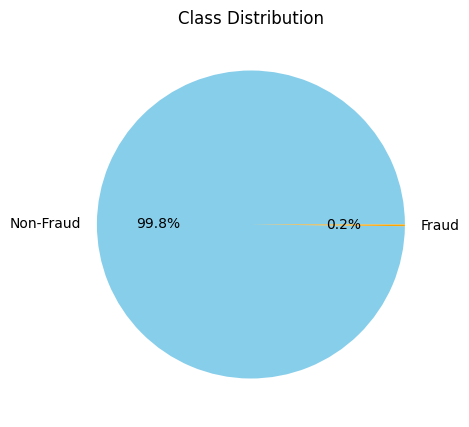

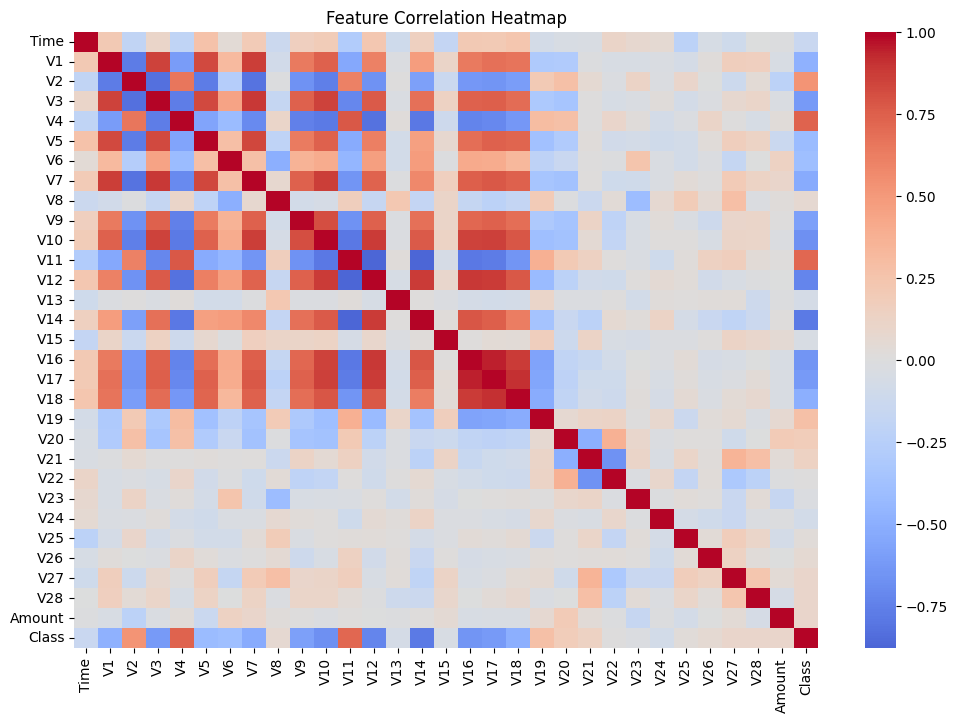


Training Random Forest...
Accuracy: 100.00%
ROC AUC: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1000
           1       1.00      1.00      1.00       492

    accuracy                           1.00      1492
   macro avg       1.00      1.00      1.00      1492
weighted avg       1.00      1.00      1.00      1492



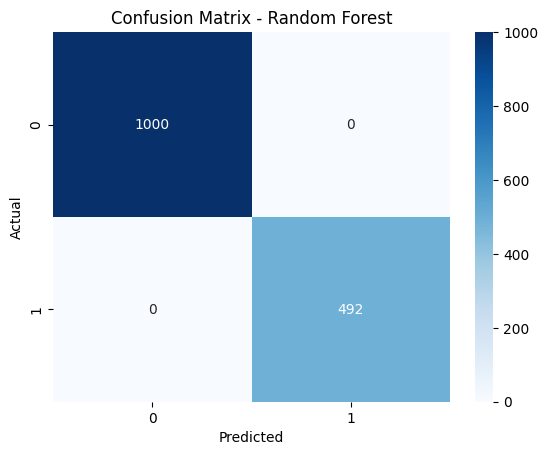

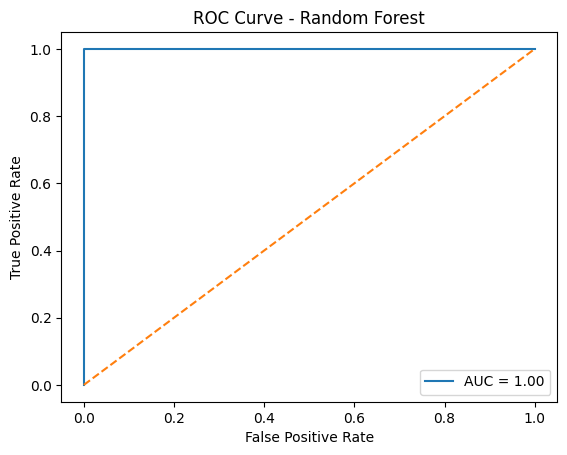


Training Logistic Regression...
Accuracy: 96.31%
ROC AUC: 0.9862
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1000
           1       0.98      0.90      0.94       492

    accuracy                           0.96      1492
   macro avg       0.97      0.95      0.96      1492
weighted avg       0.96      0.96      0.96      1492



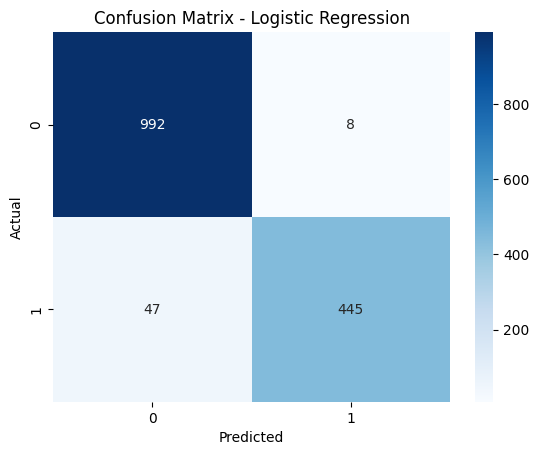

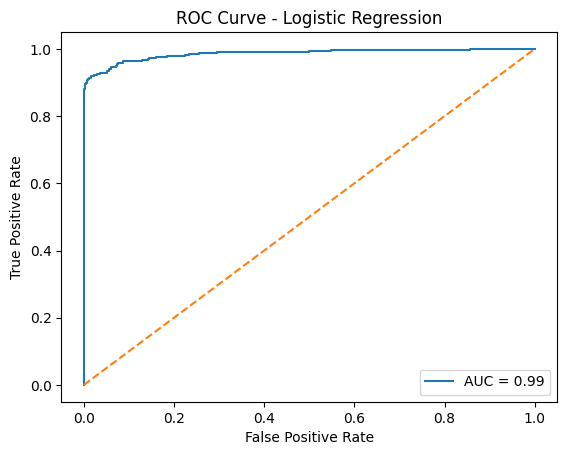


Training Gradient Boosting...
Accuracy: 99.60%
ROC AUC: 1.0000
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1000
           1       1.00      0.99      0.99       492

    accuracy                           1.00      1492
   macro avg       1.00      0.99      1.00      1492
weighted avg       1.00      1.00      1.00      1492



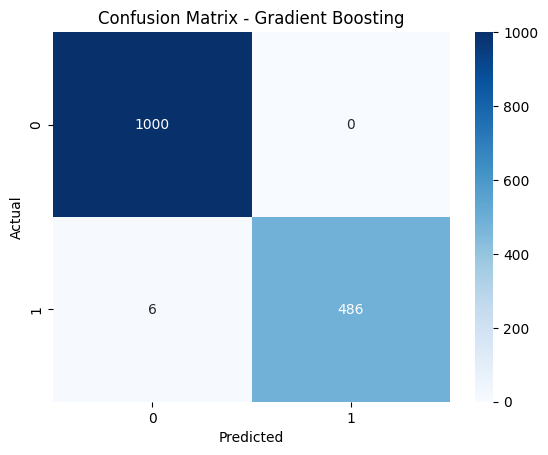

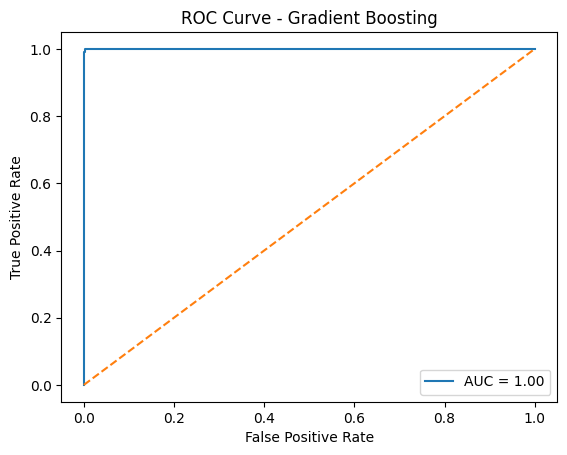


Training AdaBoost...
Accuracy: 97.25%
ROC AUC: 0.9984
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1000
           1       0.99      0.93      0.96       492

    accuracy                           0.97      1492
   macro avg       0.98      0.96      0.97      1492
weighted avg       0.97      0.97      0.97      1492



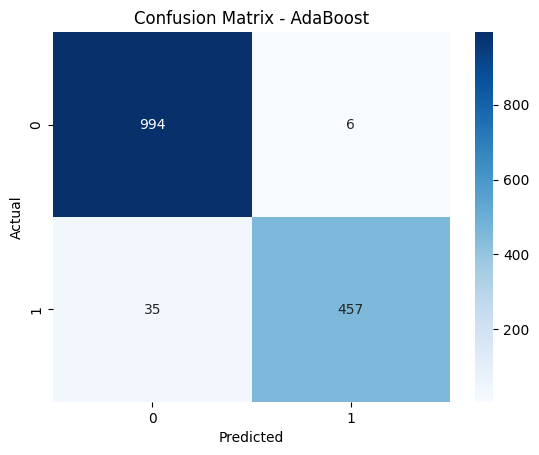

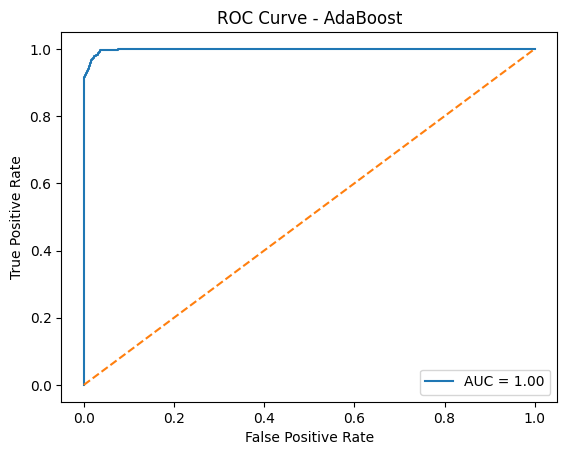


Training KNN (K=1)...
Accuracy: 100.00%
ROC AUC: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1000
           1       1.00      1.00      1.00       492

    accuracy                           1.00      1492
   macro avg       1.00      1.00      1.00      1492
weighted avg       1.00      1.00      1.00      1492



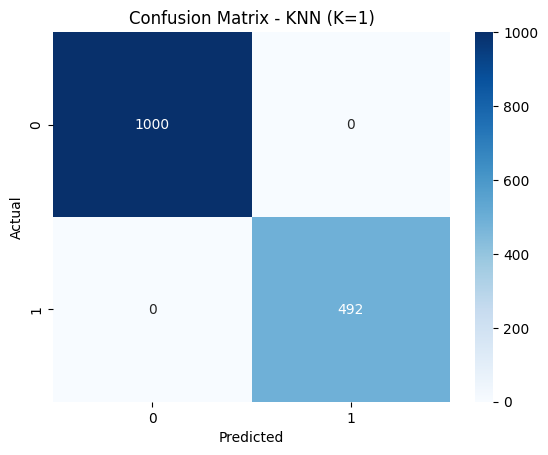

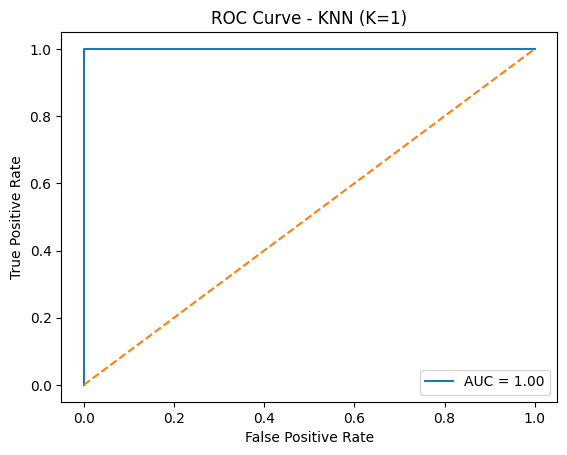


Training Decision Tree...
Accuracy: 100.00%
ROC AUC: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1000
           1       1.00      1.00      1.00       492

    accuracy                           1.00      1492
   macro avg       1.00      1.00      1.00      1492
weighted avg       1.00      1.00      1.00      1492



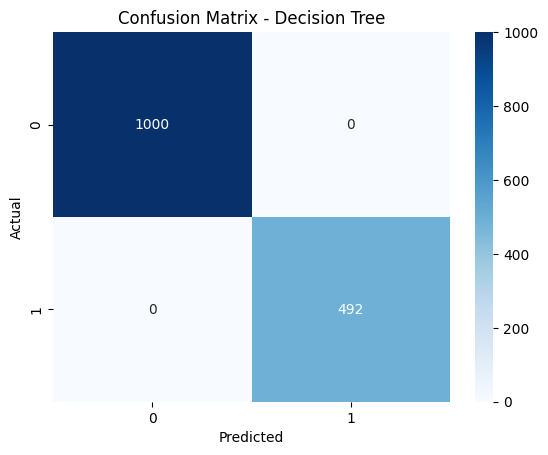

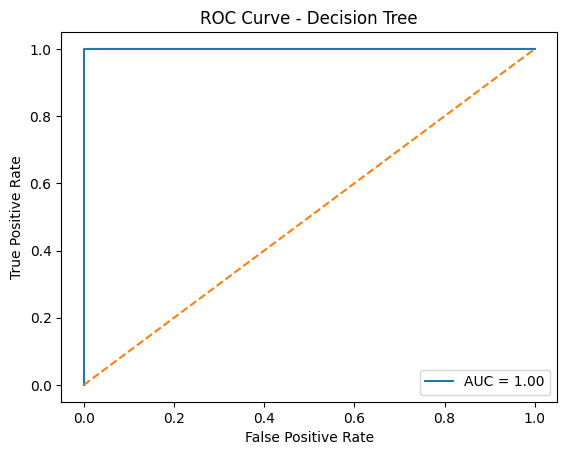


Training Extra Trees...
Accuracy: 100.00%
ROC AUC: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1000
           1       1.00      1.00      1.00       492

    accuracy                           1.00      1492
   macro avg       1.00      1.00      1.00      1492
weighted avg       1.00      1.00      1.00      1492



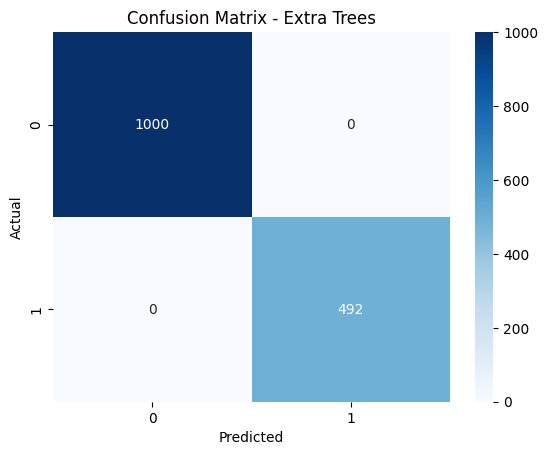

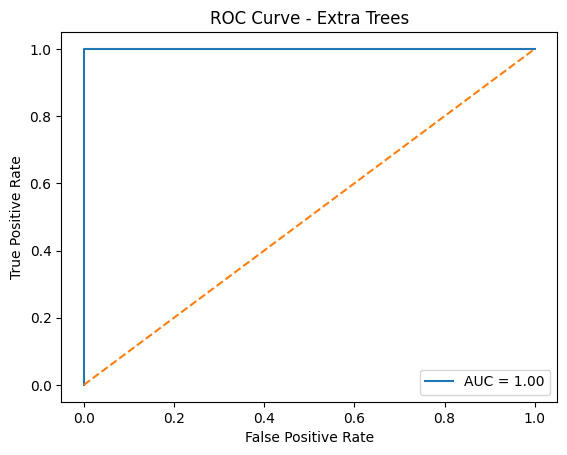

/tmp/ipython-input-14-2132477568.py:110: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette="viridis")


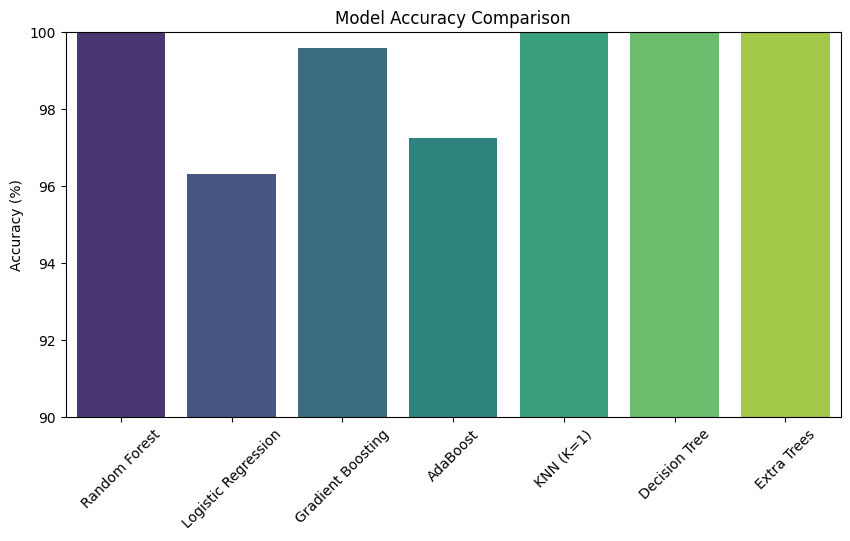

/tmp/ipython-input-14-2132477568.py:119: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=roc_aucs, palette="rocket")


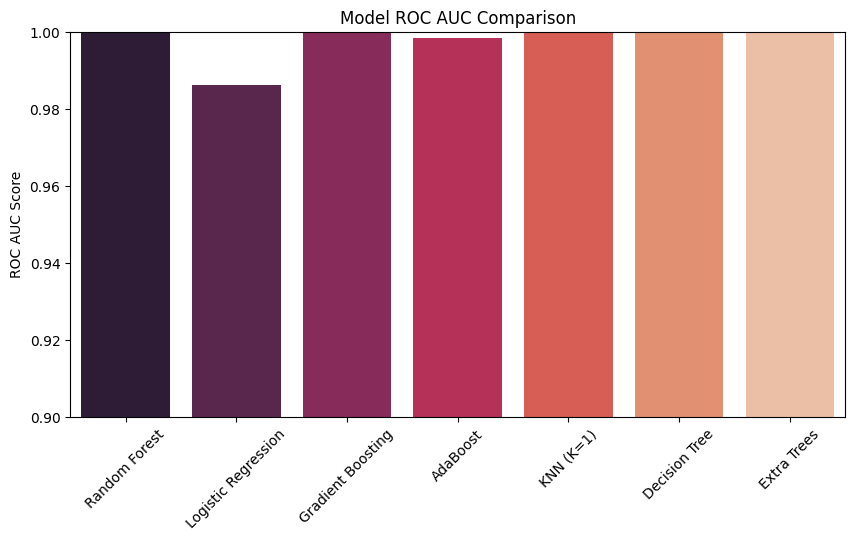

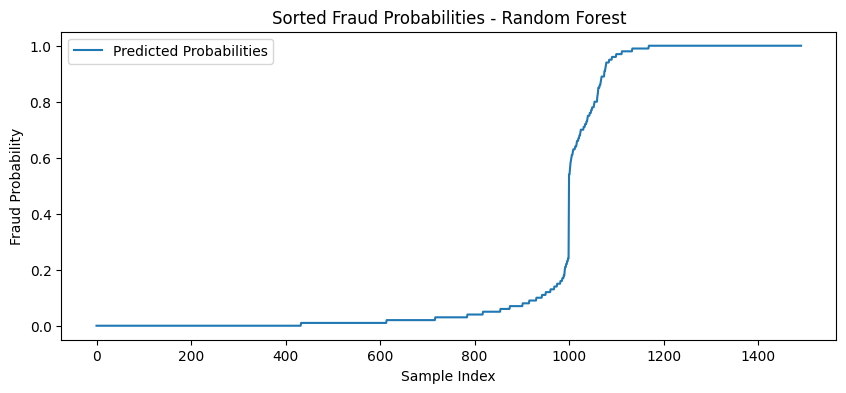

In [14]:
# Install dependencies if needed
!pip install -q imbalanced-learn

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score

# Load and prepare the dataset
df = pd.read_csv('creditcard.csv')
df = df.dropna(subset=['Class'])

# Pie chart: Fraud vs Non-Fraud
plt.figure(figsize=(5, 5))
df['Class'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Non-Fraud', 'Fraud'], colors=['skyblue', 'orange'])
plt.title('Class Distribution')
plt.ylabel('')
plt.show()

# Downsample majority class
fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0].sample(n=1000, random_state=42)
df_sampled = pd.concat([fraud, non_fraud])

X = df_sampled.drop('Class', axis=1)
y = df_sampled['Class']

# Feature correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_sampled.corr(), cmap='coolwarm', center=0)
plt.title("Feature Correlation Heatmap")
plt.show()

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100),
    'AdaBoost': AdaBoostClassifier(n_estimators=100),
    'KNN (K=1)': KNeighborsClassifier(n_neighbors=1),
    'Decision Tree': DecisionTreeClassifier(),
    'Extra Trees': ExtraTreesClassifier(n_estimators=100)
}

# Store scores
model_names = []
accuracies = []
roc_aucs = []
best_model = None
best_auc = 0
best_probs = None
best_preds = None

# Training and evaluation
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_scaled, y)
    y_pred = model.predict(X_scaled)
    y_prob = model.predict_proba(X_scaled)[:, 1]

    acc = accuracy_score(y, y_pred)
    auc = roc_auc_score(y, y_prob)
    model_names.append(name)
    accuracies.append(acc * 100)
    roc_aucs.append(auc)

    print(f"Accuracy: {acc*100:.2f}%")
    print(f"ROC AUC: {auc:.4f}")
    print(classification_report(y, y_pred))

    # Save best model info
    if auc > best_auc:
        best_auc = auc
        best_model = name
        best_probs = y_prob
        best_preds = y_pred

    # Confusion Matrix
    conf_matrix = confusion_matrix(y, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y, y_prob)
    plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.title(f"ROC Curve - {name}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

# Accuracy % Bar Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=model_names, y=accuracies, palette="viridis")
plt.ylabel("Accuracy (%)")
plt.title("Model Accuracy Comparison")
plt.ylim(90, 100)
plt.xticks(rotation=45)
plt.show()

# ROC AUC Bar Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=model_names, y=roc_aucs, palette="rocket")
plt.ylabel("ROC AUC Score")
plt.title("Model ROC AUC Comparison")
plt.ylim(0.90, 1.0)
plt.xticks(rotation=45)
plt.show()

# Line Plot: Probabilities of Best Model
plt.figure(figsize=(10, 4))
plt.plot(sorted(best_probs), label="Predicted Probabilities")
plt.title(f"Sorted Fraud Probabilities - {best_model}")
plt.xlabel("Sample Index")
plt.ylabel("Fraud Probability")
plt.legend()
plt.show()


In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
